In [3]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb

In [8]:
# 1. Load processed data
X_train_scaled, X_test_scaled, y_train, y_test, le, feature_names = joblib.load(r'...\data\processed\processed_data.pkl')
print("Loaded preprocessed data.")

Loaded preprocessed data.



Random Forest Report:

                          precision    recall  f1-score   support

              No Failure       1.00      0.64      0.78        22
Heat Dissipation Failure       0.98      1.00      0.99      1930
           Power Failure       1.00      0.50      0.67        16
      Overstrain Failure       1.00      0.47      0.64        19
       Tool Wear Failure       0.00      0.00      0.00         4
         Random Failures       0.00      0.00      0.00         9

                accuracy                           0.98      2000
               macro avg       0.66      0.44      0.51      2000
            weighted avg       0.97      0.98      0.98      2000



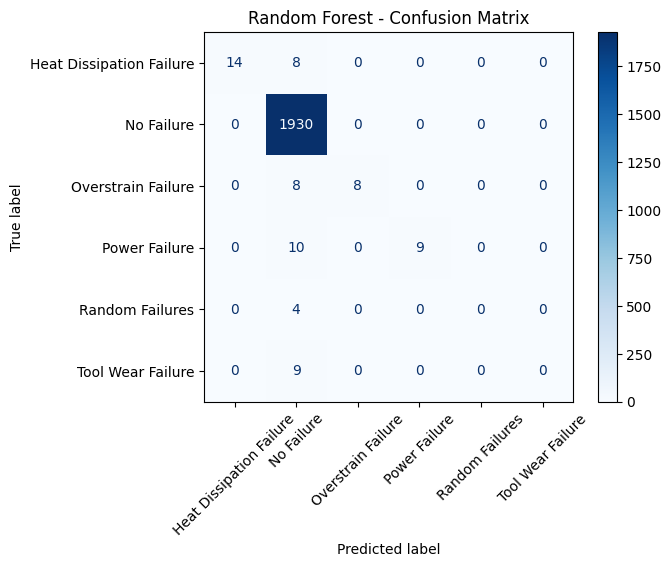

In [5]:
# 2. Random Forest Model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

target_names = ['No Failure', 'Heat Dissipation Failure', 'Power Failure',
                'Overstrain Failure', 'Tool Wear Failure', 'Random Failures']

print("\nRandom Forest Report:\n")
print(classification_report(y_test, y_pred_rf, target_names=target_names, zero_division=0))

ConfusionMatrixDisplay.from_estimator(rf, X_test_scaled, y_test, display_labels=le.classes_, cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xticks(rotation=45)
plt.show()

In [6]:
# 3. XGBoost Model
# Clean feature names for compatibility
cleaned_feature_names = [col.replace('[', '').replace(']', '').replace('<', '') for col in feature_names]

xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=6, eval_metric='mlogloss')
xgb_clf.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_clf.predict(X_test_scaled)

print("\nXGBoost Report:\n")
print(classification_report(y_test, y_pred_xgb, target_names=target_names, zero_division=0))


XGBoost Report:

                          precision    recall  f1-score   support

              No Failure       1.00      0.91      0.95        22
Heat Dissipation Failure       0.99      1.00      0.99      1930
           Power Failure       0.82      0.88      0.85        16
      Overstrain Failure       0.94      0.79      0.86        19
       Tool Wear Failure       0.00      0.00      0.00         4
         Random Failures       0.00      0.00      0.00         9

                accuracy                           0.99      2000
               macro avg       0.63      0.60      0.61      2000
            weighted avg       0.98      0.99      0.98      2000



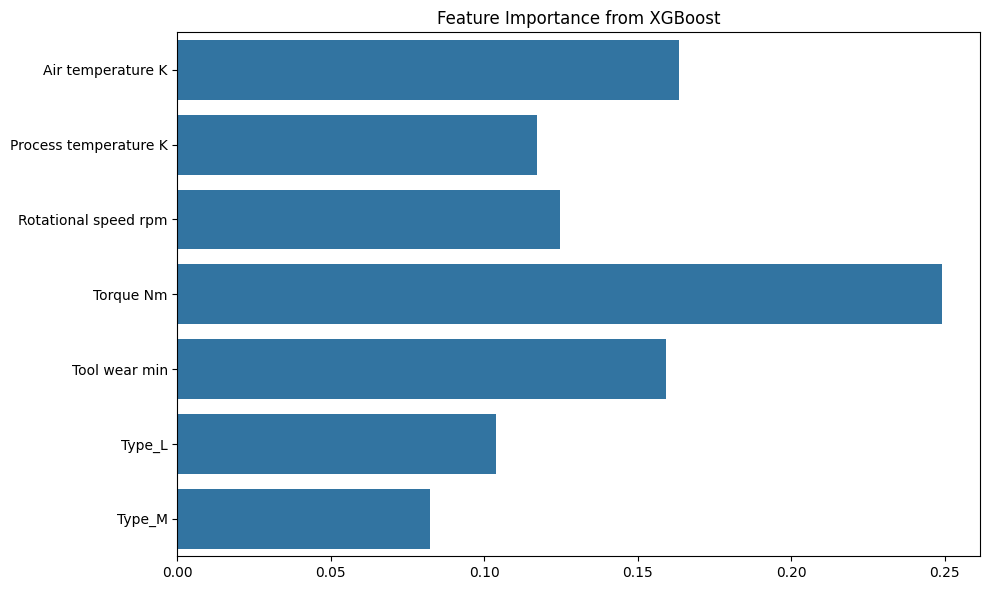

In [7]:
# 4. Feature Importance
importances = xgb_clf.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=cleaned_feature_names)
plt.title("Feature Importance from XGBoost")
plt.tight_layout()
plt.show()